# Plotting of the tracking data
Here, the results of the tracking data analysis are plotted. This relies on the results created by the notebook "analyze_tracking.ipynb".

Author: Bjarne Schultze <br>
Last modified: 29.11.2024

In [ ]:
# Necessary modules import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import modules.plotting_utils as myplt
import modules.data_handling_utils as dutils

plt.style.use('./plotstyle_bjarne.mplstyle')

In [29]:
# Choose an experimental group
exp_grp = "vMS12-SS3"

#### Preparations
Loading the data, extracting the indices

In [30]:
# Load the results from the analysis of the annotations 
datadict = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp}_tracks.hdf5")
# Get number of experiments
number_exp = datadict["male/change_velocity_male"].shape[0]

# Extract the changes in the tracking metrics upon activation
change_velo = datadict['male/change_velocity_male']

change_wingang = datadict['male/change_wingangle']

# Extract the mean tracking traces
mean_tracks_m = datadict['male/med_tracks_male']

# Get the indices for the metrics
index_metrics = datadict['male/med_tracks_male_index'].astype("str")

if "ctrl" not in exp_grp: 
    # Get number of experiments
    number_mf_exp = datadict["male_female/change_velocity_male"].shape[0]

    # Extract the changes in the tracking metrics upon activation
    change_velo_m = datadict['male_female/change_velocity_male']
    change_velo_f = datadict['male_female/change_velocity_female']

    change_dist = datadict['male_female/change_distance']

    change_wingang_m = datadict['male_female/change_wingangle']

    # Extract the mean tracking traces
    mean_tracks_mf_m = datadict['male_female/med_tracks_male']
    mean_tracks_mf_f = datadict['male_female/med_tracks_female']

    mean_rel_tracks_m = datadict['male_female/med_relative_tracks_male']
    mean_rel_tracks_f = datadict['male_female/med_relative_tracks_female']

    # Get the indices for the metrics
    index_rel_metrics = datadict['male_female/med_relative_tracks_male_index'].astype("str")

In [31]:
# Store the audio and tracking sampling rates
sampling_rate = 10000    # [Hz]
sampling_rate_tracking = 1000   # [Hz]

# Define a set of colors
m_col = "darkcyan"
m_sol_col = "skyblue"
f_col = "firebrick"

In [32]:
# Get indices for certain metrics
velo_idx = np.where(index_metrics == "velocity_forward")[0][0]
accmag_idx = np.where(index_metrics == "acceleration_mag")[0][0]
wingang_idx = np.where(index_metrics == "wing_angle_sum")[0][0]
wing_sum_idx = np.where(index_metrics == "wing_angle_sum")[0][0]
if "ctrl" not in exp_grp: dist_idx = np.where(index_rel_metrics == "distance")[0][0]

# Create a suitable time vector for plotting
if exp_grp == "pIP10":
    time_vec = np.arange(-5, 10, 1/sampling_rate_tracking)
    stim_len = 5
else:
    time_vec = np.arange(-5, 9, 1/sampling_rate_tracking)
    stim_len = 4

In [33]:
# Load the test results
test_res = pd.read_csv("E:/MT/additional_files/test_results_tracking_changes.csv")
# Set the alpha threshold 
alpha_threshold = 0.05

# Split the test results per condition (m/mf)
test_res_m = test_res.loc[np.logical_and(test_res["condition"] == "m", test_res["group"] == exp_grp), :]
test_res_mf = test_res.loc[np.logical_and(test_res["condition"] == "mf", test_res["group"] == exp_grp), :]

# Combine all results for velocity changes for plotting
effect_velo_changes = np.concatenate([test_res_m.loc[test_res_m["chg_type"] == "change_velocity", "pvalue"].to_numpy(), 
                                      test_res_mf.loc[test_res_mf["chg_type"] == "change_velocity", "pvalue"].to_numpy(),
                                      test_res_mf.loc[test_res_mf["chg_type"] == "change_velocity_f", "pvalue"].to_numpy()]) < alpha_threshold
# Get results for distance changes
effect_dist = test_res_mf.loc[test_res_mf["chg_type"] == "change_distance", "pvalue"].to_numpy() < alpha_threshold
# COmbine results for wing angle changes
effect_wingang = np.concatenate([test_res_m.loc[test_res_m["chg_type"] == "change_wingangle", "pvalue"].to_numpy(), 
                                 test_res_mf.loc[test_res_mf["chg_type"] == "change_wingangle", "pvalue"].to_numpy()]) < alpha_threshold

#### Create the plots
-- thesis plot --

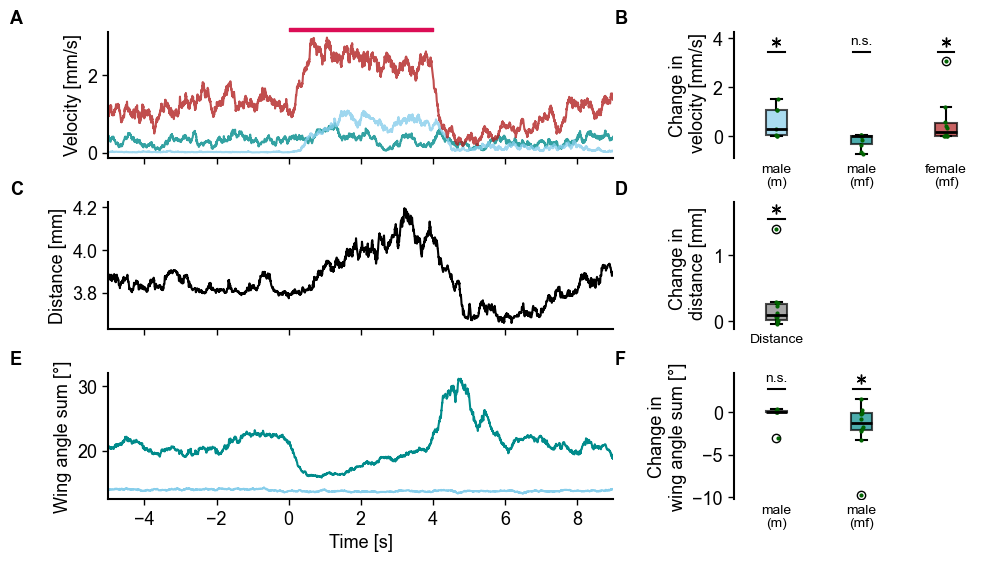

In [34]:
# Set up a new figure 
fig, ax_dict = plt.subplot_mosaic([["A", "A", "A", "A", "A", "B", "B", "B"], 
                                   ["C", "C", "C", "C", "C", "D", "D", "D"],
                                   ["E", "E", "E", "E", "E", "F", "F", "F"]], figsize=(10,5.5), constrained_layout=False)
# Get the axes handles for the single axes
axa = ax_dict["A"]
axb = ax_dict["B"]
axc = ax_dict["C"]
axd = ax_dict["D"]
axe = ax_dict["E"]
axf = ax_dict["F"]


# Plot the averaged forward velocities
axa.plot(time_vec, mean_tracks_mf_m[:, velo_idx], label="Forward vel. male (mf)", color=m_col, alpha=0.8)
axa.plot(time_vec, mean_tracks_m[:, velo_idx], label="Forward vel. male (m)", color=m_sol_col, alpha=0.8)
axa.plot(time_vec, mean_tracks_mf_f[:, velo_idx], label="Forward vel. female", color=f_col, alpha=0.8)
# Add stimulus bar
myplt.add_stim_bar(axa, stim_period=[0, stim_len])
# Add label
axa.set_ylabel("Velocity [mm/s]")
axa.set_xticklabels([])
axa.set_title("A", x=-0.195)     # -0.19, -0.215


# Add boxplots showing the changes
myplt.boxplot_dp([change_velo, change_velo_m, change_velo_f], 
                 labels=["male\n(m)", "male\n(mf)", "female\n(mf)"], boxcolor=[m_sol_col, m_col, f_col], ax=axb, markercolor="darkgreen", 
                 markersize=2, std_dp=0.01)
myplt.add_significance_stars(axb, effect_velo_changes.tolist(), [1, 2, 3], textpad=0.14)
# Adjust and label the axes
axb.spines["bottom"].set_visible(False)
axb.tick_params(axis="x", length=0.0, labelsize=10)
axb.set_ylim(top=axb.get_ylim()[-1]*1.1)
axb.set_ylabel("Change in\n velocity [mm/s]")
axb.set_title("B", x=-0.47)

# Plot the averaged male-female distance
axc.plot(time_vec, mean_rel_tracks_m[:, dist_idx], color='black')
# Add label
axc.set_ylabel("Distance [mm]")
axc.set_xticklabels([])
axc.set_title("C", x=-0.195)

# Add boxplot showing the change
myplt.boxplot_dp(change_dist, labels=["Distance"], boxcolor="gray", ax=axd, markercolor="darkgreen", markersize=2, std_dp=0.01)
myplt.add_significance_stars(axd, effect_dist.tolist(), [1], textpad=0.14)
# Add label and modify axes
axd.set_ylabel("Change in \n distance [mm]")
axd.set_xlim((0.5, 3.5))
axd.set_ylim(top=axd.get_ylim()[-1]*1.05)
axd.spines["bottom"].set_visible(False)
axd.tick_params(axis="x", length=0.0, labelsize=10)
axd.set_title("D", x=-0.47)


# Plot the averaged wing angle sum
axe.plot(time_vec, mean_tracks_mf_m[:, wing_sum_idx], color=m_col, label="Male (mf)")
axe.plot(time_vec, mean_tracks_m[:, wing_sum_idx], color=m_sol_col, label="Male (m)")
# Add lables
axe.set_ylabel("Wing angle sum [°]")
axe.set_xlabel("Time [s]")
axe.set_title("E", x=-0.195)

# Add boxplots showing the change
myplt.boxplot_dp([change_wingang, change_wingang_m], labels=["male\n(m)", "male\n(mf)"], 
                 boxcolor=[m_sol_col, m_col], ax=axf, markercolor="darkgreen", markersize=2, std_dp=0.01)
myplt.add_significance_stars(axf, effect_wingang.tolist(), [1, 2], textpad=0.14)
# Modify axes and add label
axf.set_xlim((0.5, 3.5))
axf.set_ylim(top=axf.get_ylim()[-1]*1.15)
axf.set_ylabel("Change in\nwing angle sum [°]")
axf.spines["bottom"].set_visible(False)
axf.tick_params(axis="x", length=0.0, labelsize=10)
axf.set_title("F", x=-0.47)


# Adjust subplot grid
plt.subplots_adjust(wspace=30, hspace=0.35, left=0.11, right=0.99, top=0.95, bottom=0.1)

# Save the figure
# fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking.pdf")

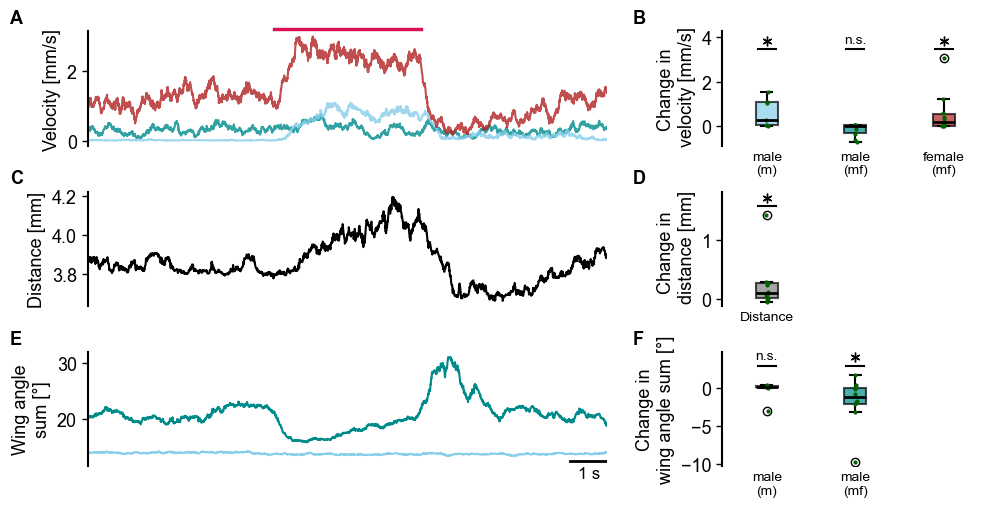

In [35]:
# Set up a new figure 
fig, ax_dict = plt.subplot_mosaic([["A", "A", "A", "A", "A", "B", "B", "B"], 
                                   ["C", "C", "C", "C", "C", "D", "D", "D"],
                                   ["E", "E", "E", "E", "E", "F", "F", "F"]], figsize=(10,5), constrained_layout=False)
# Get the axes handles for the single axes
axa = ax_dict["A"]
axb = ax_dict["B"]
axc = ax_dict["C"]
axd = ax_dict["D"]
axe = ax_dict["E"]
axf = ax_dict["F"]


# Plot the averaged forward velocities
axa.plot(time_vec, mean_tracks_mf_m[:, velo_idx], label="Forward vel. male (mf)", color=m_col, alpha=0.8)
axa.plot(time_vec, mean_tracks_m[:, velo_idx], label="Forward vel. male (m)", color=m_sol_col, alpha=0.8)
axa.plot(time_vec, mean_tracks_mf_f[:, velo_idx], label="Forward vel. female", color=f_col, alpha=0.8)
axa.spines["bottom"].set_visible(False)
axa.tick_params(axis="x", length=0.0, labelsize=10)

# Add stimulus bar
myplt.add_stim_bar(axa, stim_period=[0, stim_len])
# Add label
axa.set_ylabel("Velocity [mm/s]")
axa.set_xticklabels([])
axa.set_title("A", x=-0.15)     # -0.15, -0.17


# Add boxplots showing the changes
myplt.boxplot_dp([change_velo, change_velo_m, change_velo_f], 
                 labels=["male\n(m)", "male\n(mf)", "female\n(mf)"], boxcolor=[m_sol_col, m_col, f_col], ax=axb, markercolor="darkgreen", 
                 markersize=2, std_dp=0.01)
myplt.add_significance_stars(axb, effect_velo_changes.tolist(), [1, 2, 3], textpad=0.14)
# Adjust and label the axes
axb.spines["bottom"].set_visible(False)
axb.tick_params(axis="x", length=0.0, labelsize=10)
axb.set_ylim(top=axb.get_ylim()[-1]*1.1)
axb.set_ylabel("Change in\n velocity [mm/s]")
axb.set_title("B", x=-0.34)

# Plot the averaged male-female distance
axc.plot(time_vec, mean_rel_tracks_m[:, dist_idx], color='black')
axc.spines["bottom"].set_visible(False)
axc.tick_params(axis="x", length=0.0, labelsize=10)
# Add label
axc.set_ylabel("Distance [mm]")
axc.set_xticklabels([])
axc.set_title("C", x=-0.15)

# Add boxplot showing the change
myplt.boxplot_dp(change_dist, labels=["Distance"], boxcolor="gray", ax=axd, markercolor="darkgreen", markersize=2, std_dp=0.01)
myplt.add_significance_stars(axd, effect_dist.tolist(), [1], textpad=0.14)
# Add label and modify axes
axd.set_ylabel("Change in \n distance [mm]")
axd.set_xlim((0.5, 3.5))
axd.set_ylim(top=axd.get_ylim()[-1]*1.05)
axd.spines["bottom"].set_visible(False)
axd.tick_params(axis="x", length=0.0, labelsize=10)
axd.set_title("D", x=-0.34)


# Plot the averaged wing angle sum
axe.plot(time_vec, mean_tracks_mf_m[:, wing_sum_idx], color=m_col, label="Male (mf)")
axe.plot(time_vec, mean_tracks_m[:, wing_sum_idx], color=m_sol_col, label="Male (m)")
axe.plot([axe.get_xlim()[-1]-1, axe.get_xlim()[-1]], [axe.get_ylim()[0], axe.get_ylim()[0]], color="black", linewidth=2)
axe.spines["bottom"].set_visible(False)
axe.tick_params(axis="x", length=0.0, labelsize=10)
axe.set_xticklabels([])
# Add lables
axe.set_ylabel("Wing angle\nsum [°]")
axe.set_title("E", x=-0.15)
axe.text(axe.get_xlim()[-1]-0.5, axe.get_ylim()[0], "1 s", horizontalalignment="center", verticalalignment="top", fontsize=12)

# Add boxplots showing the change
myplt.boxplot_dp([change_wingang, change_wingang_m], labels=["male\n(m)", "male\n(mf)"], 
                 boxcolor=[m_sol_col, m_col], ax=axf, markercolor="darkgreen", markersize=2, std_dp=0.01)
myplt.add_significance_stars(axf, effect_wingang.tolist(), [1, 2], textpad=0.14)
# Modify axes and add label
axf.set_xlim((0.5, 3.5))
axf.set_ylim(top=axf.get_ylim()[-1]*1.15)
axf.set_ylabel("Change in\nwing angle sum [°]")
axf.spines["bottom"].set_visible(False)
axf.tick_params(axis="x", length=0.0, labelsize=10)
axf.set_title("F", x=-0.34)


# Adjust subplot grid
plt.subplots_adjust(wspace=10, hspace=0.4, left=0.09, right=0.99, top=0.95, bottom=0.08)

# Save the figure
# fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking.pdf")

Plot all tracking metrics

 -- absolute metrics --

In [ ]:
# Set up a figure for the averaged absolute measures of the male
fig, ax = plt.subplots(2, 2, figsize=(9,4))
fig.suptitle(f"{exp_grp} - Male (mf condition) - absolute metrics", fontsize=14)
ax = ax.flatten()

# Plot the averaged metrics (splitted to better distinguish them)
ax[0].plot(time_vec, mean_tracks_mf_m[:,:4])
ax[1].plot(time_vec, mean_tracks_mf_m[:,4:8])
ax[2].plot(time_vec, mean_tracks_mf_m[:,8:13])
ax[3].plot(time_vec, mean_tracks_mf_m[:,13:])
# Add legends
ax[0].legend(index_metrics[:4])
ax[1].legend(index_metrics[4:8])
ax[2].legend(index_metrics[8:13])
ax[3].legend(index_metrics[13:])

# Save figure
# fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_mf_male_abs.pdf")


# Set up a figure for the averaged absolute measures of the female
fig2, ax2 = plt.subplots(2, 2, figsize=(9,4))
fig2.suptitle(f"{exp_grp} - Female (mf condition) - absolute metrics", fontsize=14)
ax2 = ax2.flatten()

# Plot the averaged metrics
ax2[0].plot(time_vec, mean_tracks_mf_f[:,:4])
ax2[1].plot(time_vec, mean_tracks_mf_f[:,4:8])
ax2[2].plot(time_vec, mean_tracks_mf_f[:,8:13])
ax2[3].plot(time_vec, mean_tracks_mf_f[:,13:])
# Add legends
ax2[0].legend(index_metrics[:4])
ax2[1].legend(index_metrics[4:8])
ax2[2].legend(index_metrics[8:13])
ax2[3].legend(index_metrics[13:])

# Save figure
# fig2.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_mf_female_abs.pdf")

# Set up a figure for the averaged absolute measures of the male (solitary condition)
fig3, ax3 = plt.subplots(2, 2, figsize=(9,4))
fig3.suptitle(f"{exp_grp} - Male (m condition) - absolute metrics", fontsize=14)
ax3 = ax3.flatten()

# Plot the averaged metrics
ax3[0].plot(time_vec, mean_tracks_m[:,:4])
ax3[1].plot(time_vec, mean_tracks_m[:,4:8])
ax3[2].plot(time_vec, mean_tracks_m[:,8:13])
ax3[3].plot(time_vec, mean_tracks_m[:,13:])
# Add legends
ax3[0].legend(index_metrics[:4])
ax3[1].legend(index_metrics[4:8])
ax3[2].legend(index_metrics[8:13])
ax3[3].legend(index_metrics[13:])

# Save figure
# fig3.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_m_male_abs.pdf")

-- relative metrics --

In [ ]:
# Set up a figure for the averaged relative measures
fig4, ax4 = plt.subplots(2, 2, figsize=(7,3))
fig4.suptitle(f"{exp_grp} - relative metrics", fontsize=14)
ax4 = ax4.flatten()

# Plot the averaged metrics
ax4[0].plot(time_vec, mean_rel_tracks_m[:,0])
ax4[1].plot(time_vec, mean_rel_tracks_f[:,0])
ax4[2].plot(time_vec, mean_rel_tracks_m[:,1:])
ax4[3].plot(time_vec, mean_rel_tracks_f[:,1:])
# Label the plots
ax4[0].set_title("Male")
ax4[1].set_title("Female")
ax4[0].legend(index_rel_metrics[0])
ax4[2].legend(index_rel_metrics[1:])

# Save figure
# fig4.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_mf_male_rel.pdf")

-- presentation plots --

In [ ]:
# Set up a figure for the averaged absolute measures of the male
fig, ax = plt.subplots(3, 1, figsize=(12,6))
ax = ax.flatten()

# Plot the averaged metrics 
ax[0].plot(time_vec, mean_tracks_mf_m[:, velo_idx], label="Forward male (mf)", color=m_col)
ax[0].plot(time_vec, mean_tracks_m[:, velo_idx], label="Forward male (m)", color=m_sol_col)
ax[0].plot(time_vec, mean_tracks_mf_f[:, velo_idx], label="Forward female", color=f_col)
ax[1].plot(time_vec, mean_rel_tracks_m[:, dist_idx], color='black')
ax[2].plot(time_vec, mean_tracks_mf_m[:, wingang_idx], label="Wing angle sum (mf)", color=m_col)
ax[2].plot(time_vec, mean_tracks_m[:, wingang_idx], label="Wing angle sum (m)", color=m_sol_col)
# Add legends
ax[0].legend(loc="upper right")
ax[2].legend(loc="upper right")

ax[2].set_xlabel("Time [ms]")
ax[0].set_ylabel("Velocity [pixel/s]")
ax[1].set_ylabel("Distance [pixel]")
ax[2].set_ylabel("Angle [°]")

# Add a bar for the stimulation period
myplt.add_stim_bar(ax[0], [0, stim_len])

# Save figure
# fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_tracking.png")